In [43]:
import numpy as np
import pandas as pd
df=pd.read_csv('/content/Combined Data.csv')
df.head()

,Unnamed: 0,statement,status
0,0,oh my gosh,Anxiety
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,3,I've shifted my focus to something else but I'...,Anxiety
4,4,"I'm restless and restless, it's been a month n...",Anxiety


In [44]:
df.shape

(53043, 3)

In [45]:
print(df['status'].value_counts())

status
Normal                  16351
Depression              15404
Suicidal                10653
Anxiety                  3888
Bipolar                  2877
Stress                   2669
Personality disorder     1201
Name: count, dtype: int64


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53043 entries, 0 to 53042
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  53043 non-null  int64 
 1   statement   52681 non-null  object
 2   status      53043 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


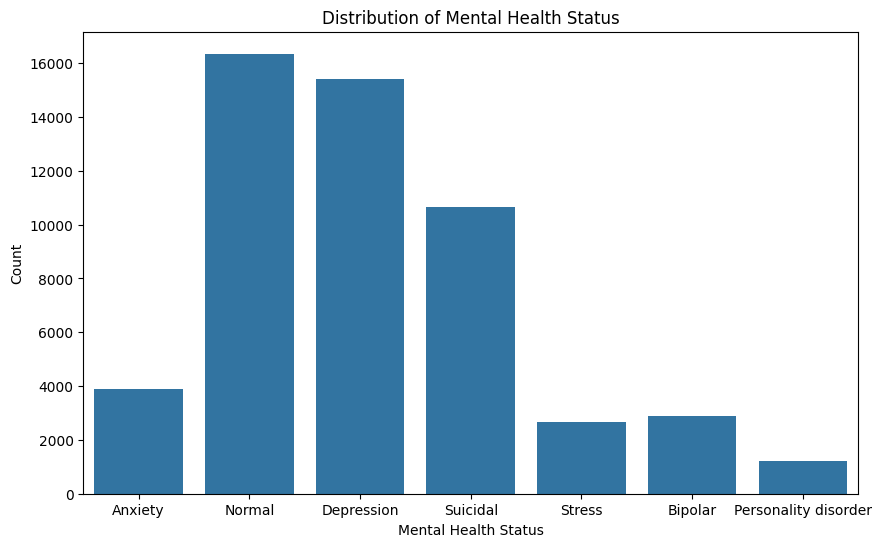

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.countplot(data=df,x='status')
plt.title('Distribution of Mental Health Status')
plt.xlabel('Mental Health Status')
plt.ylabel('Count')
plt.show()

In [48]:
df.isnull().sum()

,0
Unnamed: 0,0
statement,362
status,0


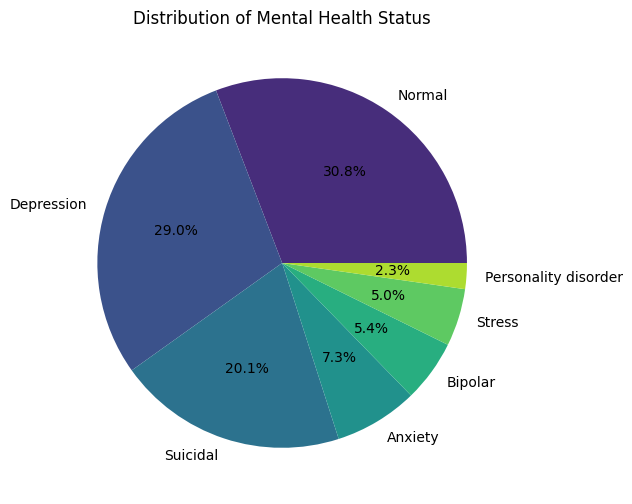

In [49]:
plt.figure(figsize=(6, 6))
df['status'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('viridis', len(df['status'].unique())))
plt.title('Distribution of Mental Health Status')
plt.ylabel('')
plt.show()


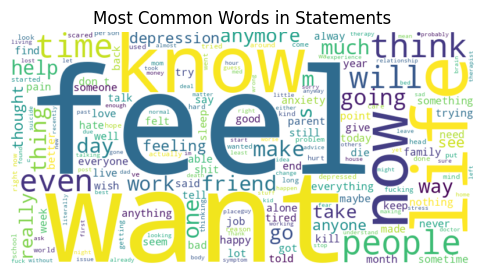

In [50]:

from wordcloud import WordCloud
text=" ".join(statement for statement in df['statement'].astype(str))
wordcloud=WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(6, 6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Statements')
plt.show()

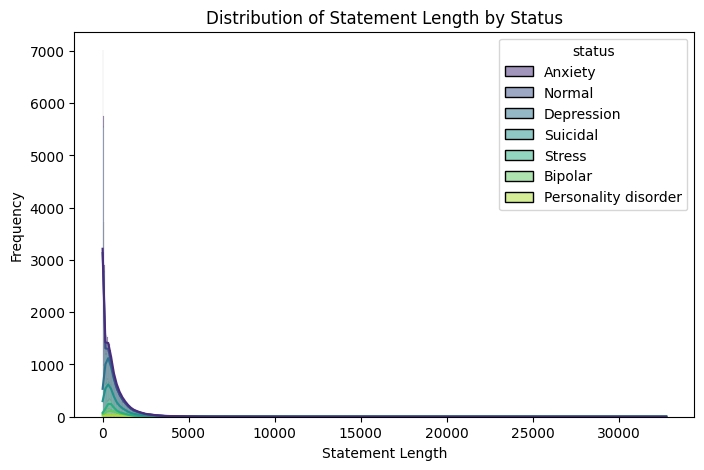

In [51]:

df['length'] = df['statement'].astype(str).apply(len)

plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='length', hue='status', multiple='stack', palette='viridis', kde=True)
plt.title('Distribution of Statement Length by Status')
plt.xlabel('Statement Length')
plt.ylabel('Frequency')
plt.show()


<ipython-input-52-ba2372ba17ee>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='status', y='length', palette='viridis')


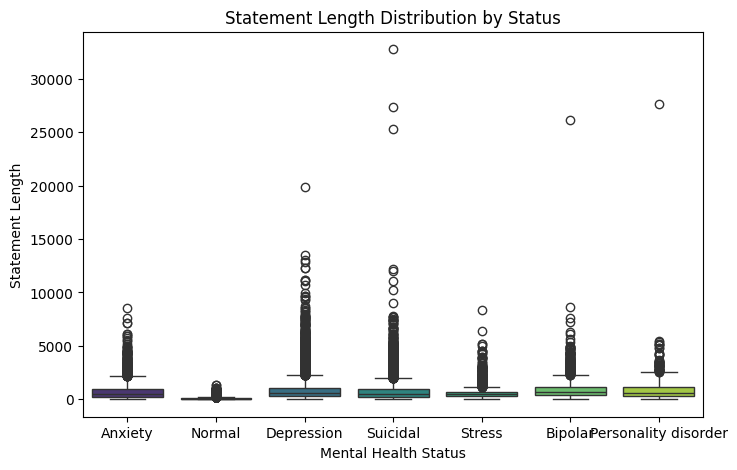

In [52]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='status', y='length', palette='viridis')
plt.title('Statement Length Distribution by Status')
plt.xlabel('Mental Health Status')
plt.ylabel('Statement Length')
plt.show()


In [12]:
df.dropna(subset=['statement', 'status'], inplace=True)

In [13]:
df.isnull().sum()

,0
Unnamed: 0,0
statement,0
status,0


In [14]:
df.shape

(52681, 3)

In [15]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['label'] = le.fit_transform(df['status'])

In [17]:
df.head()


,Unnamed: 0,statement,status,label
0,0,oh my gosh,Anxiety,0
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety,0
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,0
3,3,I've shifted my focus to something else but I'...,Anxiety,0
4,4,"I'm restless and restless, it's been a month n...",Anxiety,0


In [24]:
from sklearn.model_selection import train_test_split
X = df['statement']
y = df['label']
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
tfv=TfidfVectorizer(max_features=5000, stop_words='english')
model = make_pipeline(tfv, LogisticRegression())

model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(max_features=5000, stop_words='english')),
                ('logisticregression', LogisticRegression())])

In [27]:
from sklearn.metrics import classification_report, accuracy_score
y_pred = model.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))


Accuracy: 0.7608427446142165
Classification Report:
                       precision    recall  f1-score   support

             Anxiety       0.82      0.72      0.77       768
             Bipolar       0.88      0.65      0.74       556
          Depression       0.69      0.74      0.72      3081
              Normal       0.83      0.95      0.89      3269
Personality disorder       0.87      0.47      0.61       215
              Stress       0.70      0.38      0.50       517
            Suicidal       0.70      0.67      0.68      2131

            accuracy                           0.76     10537
           macro avg       0.78      0.65      0.70     10537
        weighted avg       0.76      0.76      0.75     10537



In [29]:
import joblib
joblib.dump(model, "mental_health_model.pkl")
joblib.dump(le, "label_encoder.pkl")

['label_encoder.pkl']

In [31]:
def predict_mental_health(statement):
    model = joblib.load("mental_health_model.pkl")
    label_encoder = joblib.load("label_encoder.pkl")
    prediction = model.predict([statement])[0]
    label = le.inverse_transform([prediction])[0]
    return label


print("Predicted Mental Health Status:", predict_mental_health("I feel so stressed and overwhelmed."))


Predicted Mental Health Status: Stress
